In [2]:
import numpy as np
import pandas as pd 
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp

# Import the Dataset

In [4]:
trump=pd.read_csv("Trumpall2.csv")
biden=pd.read_csv("Bidenall2.csv")

In [6]:
trump.head(3)

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...


In [8]:
biden.head(3)

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr


In [14]:
biden['text'][390]

'@JoeBiden Well if a person is not at home and is away like military or in a business trip yes but allowing the DNC… https://t.co/P5KFKNjhti'

In [16]:
trump.shape

(2788, 2)

## Find Polarity function 

In [33]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [34]:
trump['Sentiment Polarity']=trump['text'].apply(find_polarity)
biden['Sentiment Polarity']=biden['text'].apply(find_polarity)

In [35]:
trump

,user,text,Sentiment Polarity
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.050
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.000
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.500
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.500
4,James09254677,After 4 years you think you would have figure...,0.000
...,...,...,...
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000


In [36]:
biden

,user,text,Sentiment Polarity
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.00
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.00
2,OldlaceA,@JoeBiden So did Lying Barr,0.00
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.05
4,Aquarian0264,@JoeBiden I will vote in person thank you.,0.00
...,...,...,...
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10


## Classify sentiment polarity into Good, Bad and Neutral

In [42]:
trump['Expression Label']=np.where(trump['Sentiment Polarity']>0,'Good','Bad')
trump['Expression Label'][trump['Sentiment Polarity']==0]='Neutral'

C:\Users\deepa\AppData\Local\Temp\ipykernel_24716\2397616800.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  trump['Expression Label'][trump['Sentiment Polarity']==0]='Neutral'
C:\Users\deepa\AppData\Local\Temp\ipykernel_24716\2397616800

In [44]:
biden['Expression Label']=np.where(biden['Sentiment Polarity']>0,'Good','Bad')
biden['Expression Label'][biden['Sentiment Polarity']==0]='Neutral'

C:\Users\deepa\AppData\Local\Temp\ipykernel_24716\2422217082.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  biden['Expression Label'][biden['Sentiment Polarity']==0]='Neutral'
C:\Users\deepa\AppData\Local\Temp\ipykernel_24716\2422217082

In [46]:
trump

,user,text,Sentiment Polarity,Expression Label
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.050,Good
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.000,Neutral
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.500,Bad
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.500,Good
4,James09254677,After 4 years you think you would have figure...,0.000,Neutral
...,...,...,...,...
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000,Neutral
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000,Neutral
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225,Good
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000,Neutral


In [48]:
biden

,user,text,Sentiment Polarity,Expression Label
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.00,Neutral
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.00,Neutral
2,OldlaceA,@JoeBiden So did Lying Barr,0.00,Neutral
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.05,Good
4,Aquarian0264,@JoeBiden I will vote in person thank you.,0.00,Neutral
...,...,...,...,...
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15,Good
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00,Neutral
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00,Neutral
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10,Good


## Remove the neutral entries from the column

In [64]:
n_trump=trump[trump['Sentiment Polarity']==0.00000]
print(n_trump.shape)
cond1=trump['Sentiment Polarity'].isin(n_trump['Sentiment Polarity'])
trump.drop(trump[cond1].index,inplace=True)
print(trump.shape)

(0, 4)
(1324, 4)


In [65]:
n_biden=biden[biden['Sentiment Polarity']==0.0000]
print(n_biden.shape)

cond1=biden['Sentiment Polarity'].isin(n_biden['Sentiment Polarity'])
biden.drop(biden[cond1].index,inplace=True)
print(biden.shape)

(0, 4)
(1031, 4)


## Balance the Dataset

In [68]:
np.random.seed(10)
remove_n=324
drop_indices=np.random.choice(trump.index,remove_n,replace=False)
df_subset_trump=trump.drop(drop_indices)
print(df_subset_trump.shape)

(1000, 4)


In [71]:
np.random.seed(10)
remove_n=31
drop_indices=np.random.choice(biden.index,remove_n,replace=False)
df_subset_biden=biden.drop(drop_indices)
print(df_subset_biden.shape)

(1000, 4)


In [79]:
count1=df_subset_trump.groupby('Expression Label').count()
count1

,user,text,Sentiment Polarity
Expression Label,,,
Bad,449,449,449
Good,551,551,551


In [80]:
count2=df_subset_biden.groupby('Expression Label').count()
count2

,user,text,Sentiment Polarity
Expression Label,,,
Bad,393,393,393
Good,607,607,607


## Percentage of good and bad reviews for Trump

In [95]:
neg_per=(count1['Sentiment Polarity'][0]/1000)*100
good_per=(count1['Sentiment Polarity'][1]/1000)*100


C:\Users\deepa\AppData\Local\Temp\ipykernel_24716\4255081026.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neg_per=(count1['Sentiment Polarity'][0]/1000)*100
C:\Users\deepa\AppData\Local\Temp\ipykernel_24716\4255081026.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  good_per=(count1['Sentiment Polarity'][1]/1000)*100


In [96]:
good_per

55.1

In [97]:
neg_per

44.9

## Percentage of good and bad reveiws for Biden

In [99]:
neg_per2=(count2['Sentiment Polarity'][0]/1000)*100
good_per2=(count2['Sentiment Polarity'][1]/1000)*100

C:\Users\deepa\AppData\Local\Temp\ipykernel_24716\2465441723.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neg_per2=(count2['Sentiment Polarity'][0]/1000)*100
C:\Users\deepa\AppData\Local\Temp\ipykernel_24716\2465441723.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  good_per2=(count2['Sentiment Polarity'][1]/1000)*100


In [100]:
good_per2

60.699999999999996

In [102]:
neg_per2

39.300000000000004

In [107]:
politicians=['Trump','Biden']
lis_good=[good_per,good_per2]
lis_neg=[neg_per,neg_per2]

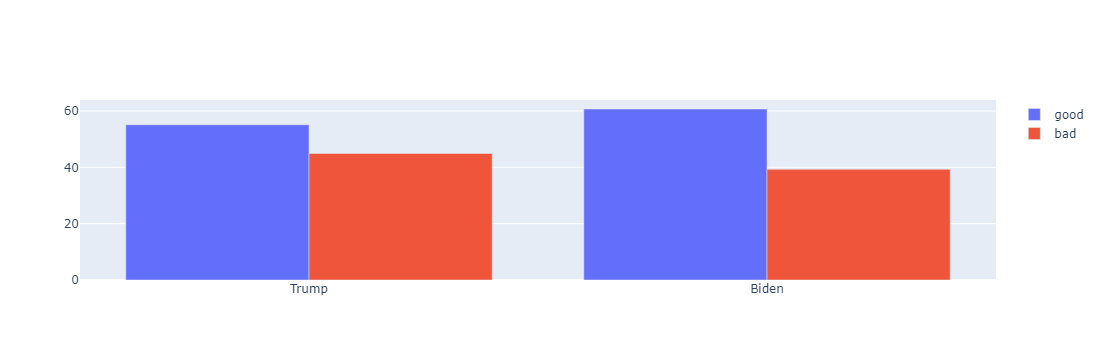

In [108]:
fig=go.Figure(
    data=[
        go.Bar(name="good",x=politicians,y=lis_good),
        go.Bar(name="bad",x=politicians,y=lis_neg)
    ]
)
fig.update_layout(barmode='group')
fig.show()